**🧾 1. Introduction & Problem Statement**

Personal loan campaigns are expensive, and banks want to improve their targeting. Your task is to help a bank identify potential customers who are likely to accept a personal loan offer, using demographic and account-related data.

**2. Load Libraries and Upload Dataset**

In [5]:
# 📦 Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# 📁 Upload the dataset (upload 'bank.csv' with semicolon-separated format)
uploaded = files.upload()
file_name = next(iter(uploaded))
df = pd.read_csv(file_name, sep=';')  # UCI dataset uses ; as separator

# 🧾 View basic info about the dataset
print("🔍 Dataset Preview:")
display(df.head())

print("\n📋 Dataset Info:")
df.info()

print("\n📊 Statistical Summary:")
display(df.describe())

# 🔍 Check for missing values
print("\n❓ Missing Values:")
print(df.isnull().sum())


Saving bank.csv to bank (2).csv
🔍 Dataset Preview:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no



📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB

📊 Statistical Summary:


,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000



❓ Missing Values:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


**3. Data Cleaning & Encoding**

In [6]:
# 🎯 Encode target variable
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# 🧠 One-hot encode categorical columns (excluding target)
categorical_cols = df.select_dtypes(include='object').columns.tolist()
if 'y' in categorical_cols:
    categorical_cols.remove('y')  # Just in case

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [7]:
# 🎯 Split the dataset
from sklearn.model_selection import train_test_split

X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**4. Exploratory Data Analysis (EDA)**

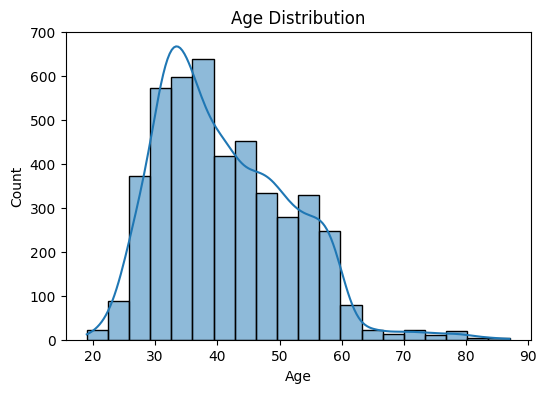

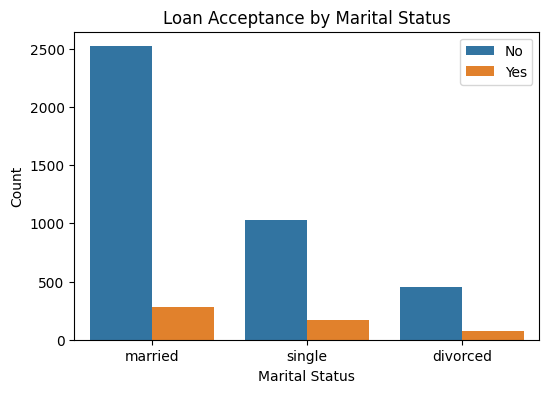

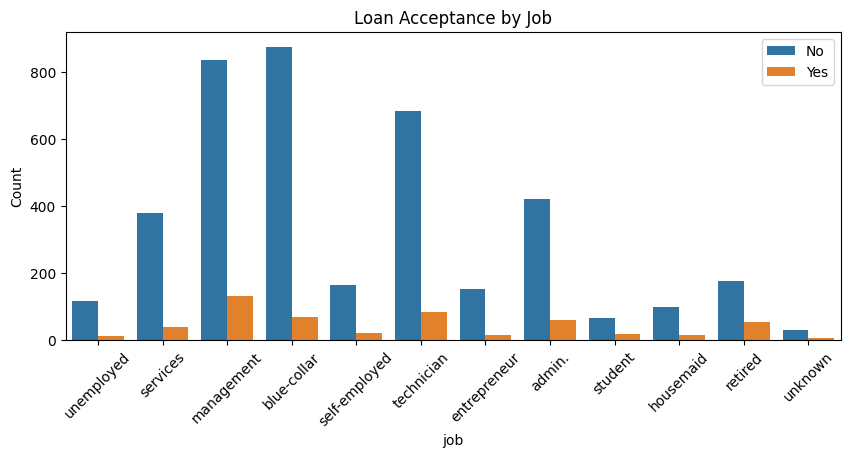

In [8]:
# Age distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Marital status vs loan acceptance
plt.figure(figsize=(6, 4))
sns.countplot(x='marital', hue='y', data=df)
plt.title('Loan Acceptance by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(['No', 'Yes'])
plt.show()

# Job vs loan acceptance
plt.figure(figsize=(10, 4))
sns.countplot(x='job', hue='y', data=df)
plt.title('Loan Acceptance by Job')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.legend(['No', 'Yes'])
plt.show()


**5. Model Training**

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Decision Tree Classifier
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**6. Evaluation**

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Logistic Regression Results
print("🔍 Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

# Decision Tree Results
print("\n🌳 Decision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))


🔍 Logistic Regression:
Accuracy: 0.8972375690607735
Confusion Matrix:
 [[787  20]
 [ 73  25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.94       807
           1       0.56      0.26      0.35        98

    accuracy                           0.90       905
   macro avg       0.74      0.62      0.65       905
weighted avg       0.88      0.90      0.88       905


🌳 Decision Tree:
Accuracy: 0.9060773480662984
Confusion Matrix:
 [[785  22]
 [ 63  35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       807
           1       0.61      0.36      0.45        98

    accuracy                           0.91       905
   macro avg       0.77      0.66      0.70       905
weighted avg       0.89      0.91      0.89       905



**7. Saving and Downloading the model**

In [11]:
import joblib

# Save model to file
joblib.dump(tree_model, 'loan_acceptance_model.pkl')

# 📥 Download the model from Colab
from google.colab import files
files.download('loan_acceptance_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>